# **ABDERRAHMANE MAMOUNI**

In [56]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Get DataShape and infos

In [58]:
print(f'data shape is {df.shape}')
df.info()

data shape is (9994, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Check for null values

In [59]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [60]:
for column in df.columns:
  if len(df[column].value_counts()) == 1:
    print(df[column].value_counts())

United States    9994
Name: Country, dtype: int64


Since all the data from united states we can drop the country and postal code columns

In [61]:
df.drop(columns=['Country','Postal Code'], inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Correlation

<ipython-input-62-a78937035f21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCor=df.corr()


<Axes: >

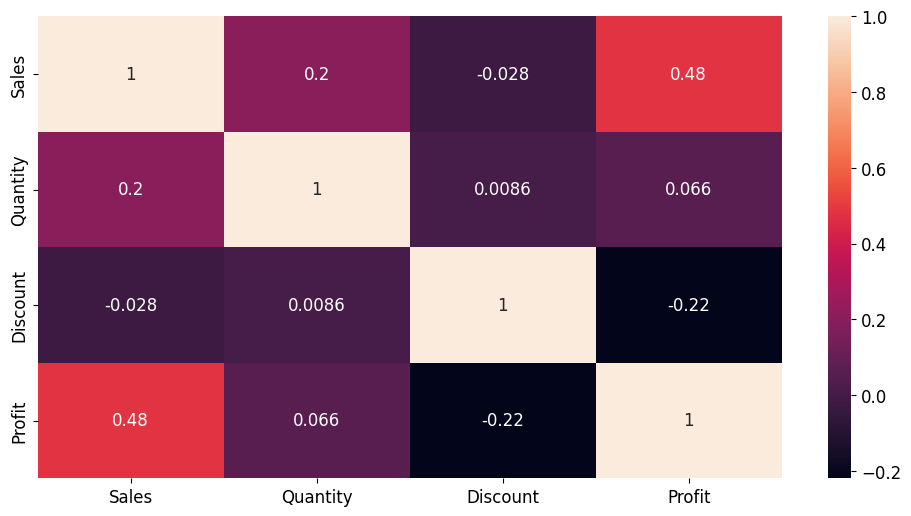

In [62]:
plt.figure(figsize=(12,6))
dfCor=df.corr()
sns.heatmap(dfCor,annot=True)

From the correlation coeifficients it's evident that the relation between variables is not strong enough.

Sales vs profit discount

based on region

<Axes: xlabel='Region', ylabel='Discount'>

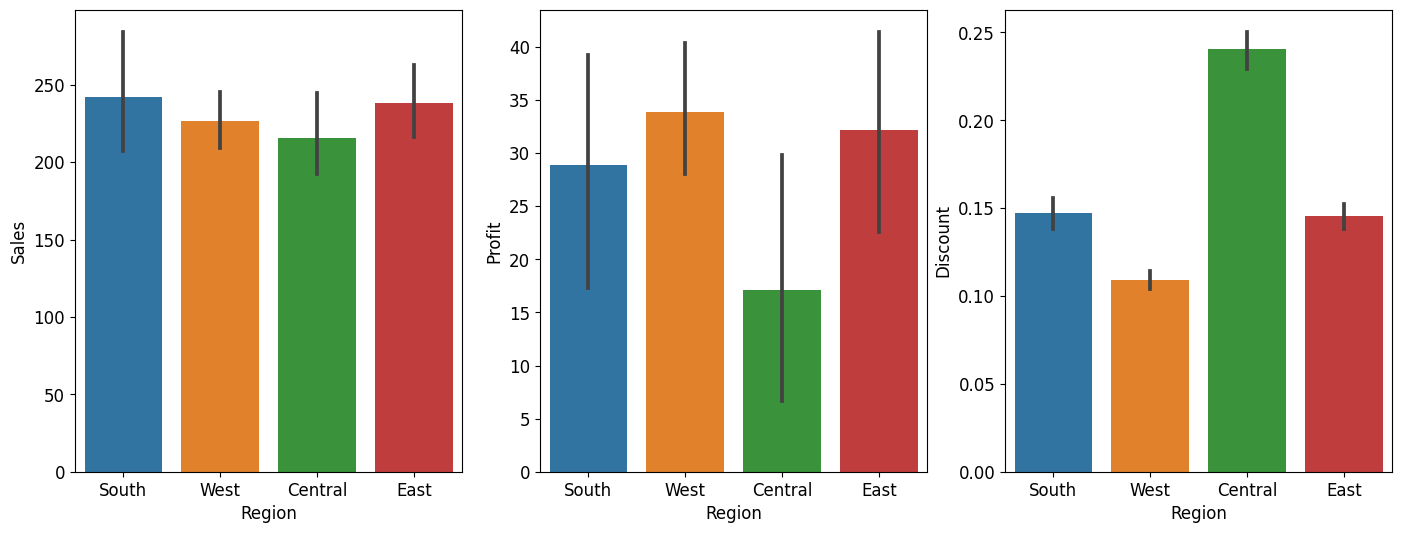

In [63]:
fig, ax=plt.subplots(1,3,figsize=(17,6))
sns.barplot(x='Region', y='Sales',data=df,ax=ax[0])
sns.barplot(x='Region', y='Profit',data=df,ax=ax[1])
sns.barplot(x='Region', y='Discount',data=df,ax=ax[2])

Based on categorie

<Axes: xlabel='Category', ylabel='Discount'>

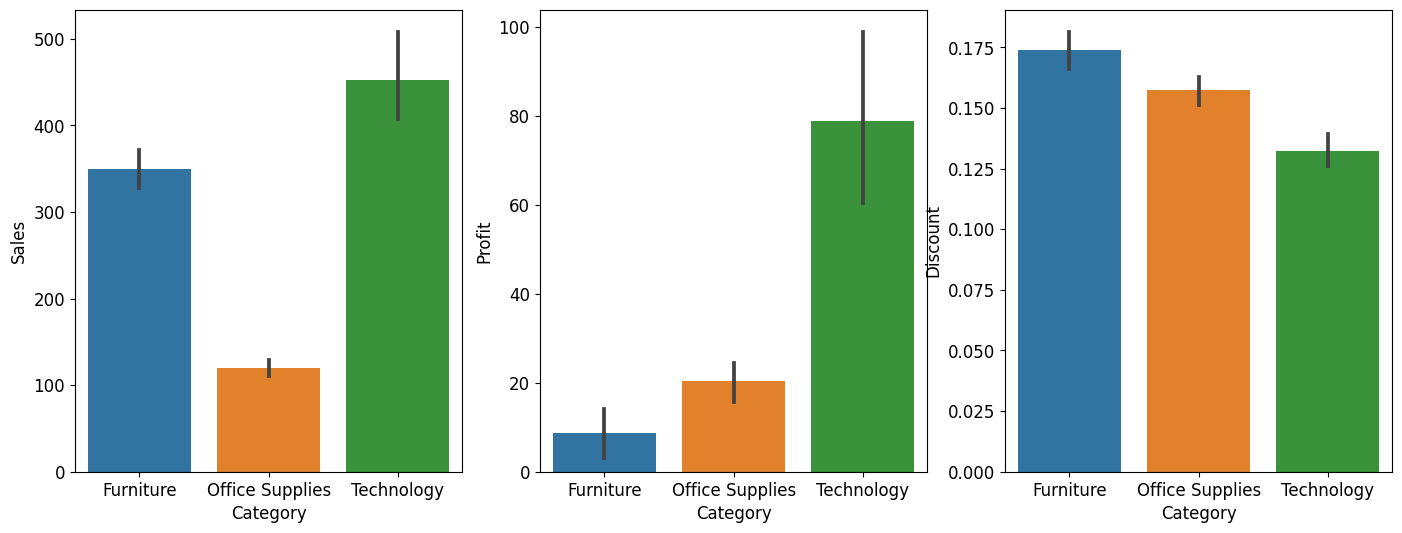

In [64]:
fig, ax=plt.subplots(1,3,figsize=(17,6))
sns.barplot(x='Category', y='Sales',data=df,ax=ax[0])
sns.barplot(x='Category', y='Profit',data=df,ax=ax[1])
sns.barplot(x='Category', y='Discount',data=df,ax=ax[2])

Based on segment

<Axes: xlabel='Segment', ylabel='Discount'>

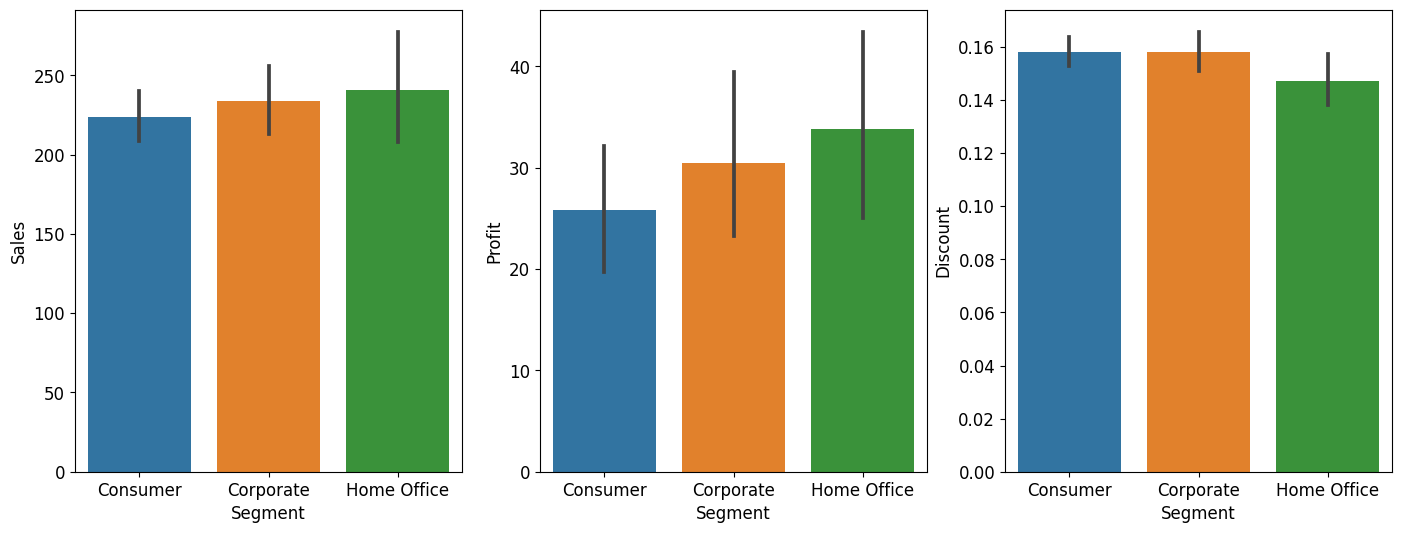

In [65]:
fig, ax=plt.subplots(1,3,figsize=(17,6))
sns.barplot(x='Segment', y='Sales',data=df,ax=ax[0])
sns.barplot(x='Segment', y='Profit',data=df,ax=ax[1])
sns.barplot(x='Segment', y='Discount',data=df,ax=ax[2])

Based on ship mode

<Axes: xlabel='Ship Mode', ylabel='Discount'>

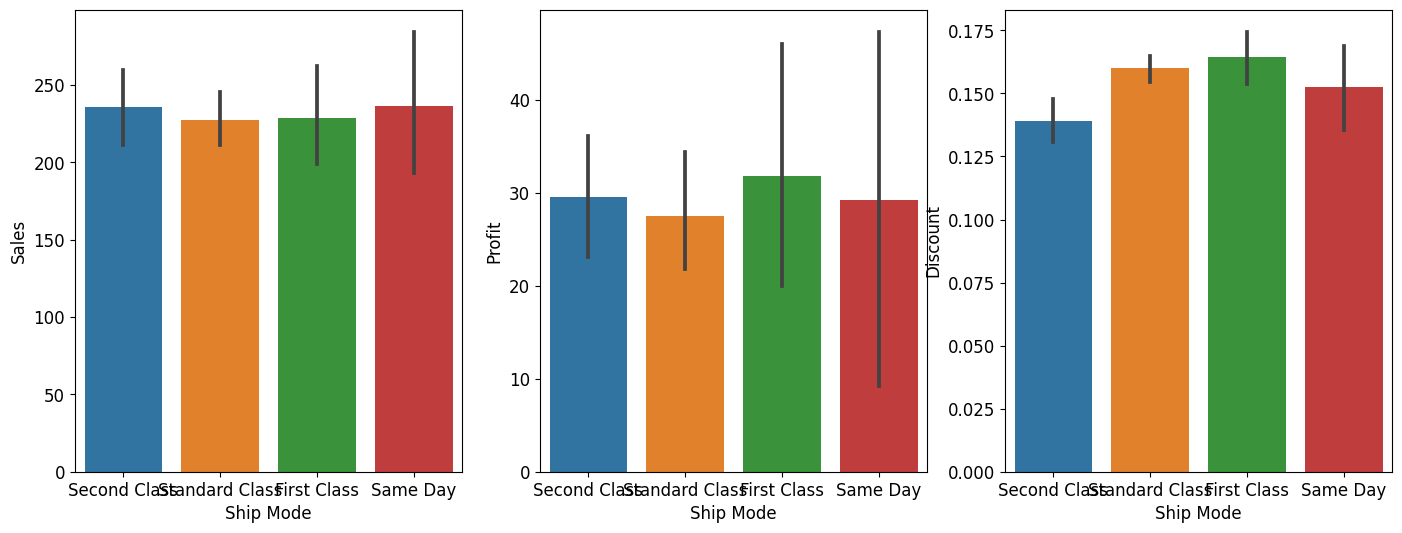

In [66]:
fig, ax=plt.subplots(1,3,figsize=(17,6))
sns.barplot(x='Ship Mode', y='Sales',data=df,ax=ax[0])
sns.barplot(x='Ship Mode', y='Profit',data=df,ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount',data=df,ax=ax[2])

Based on quantity-sales & profit & discount

<Axes: xlabel='Quantity', ylabel='Discount'>

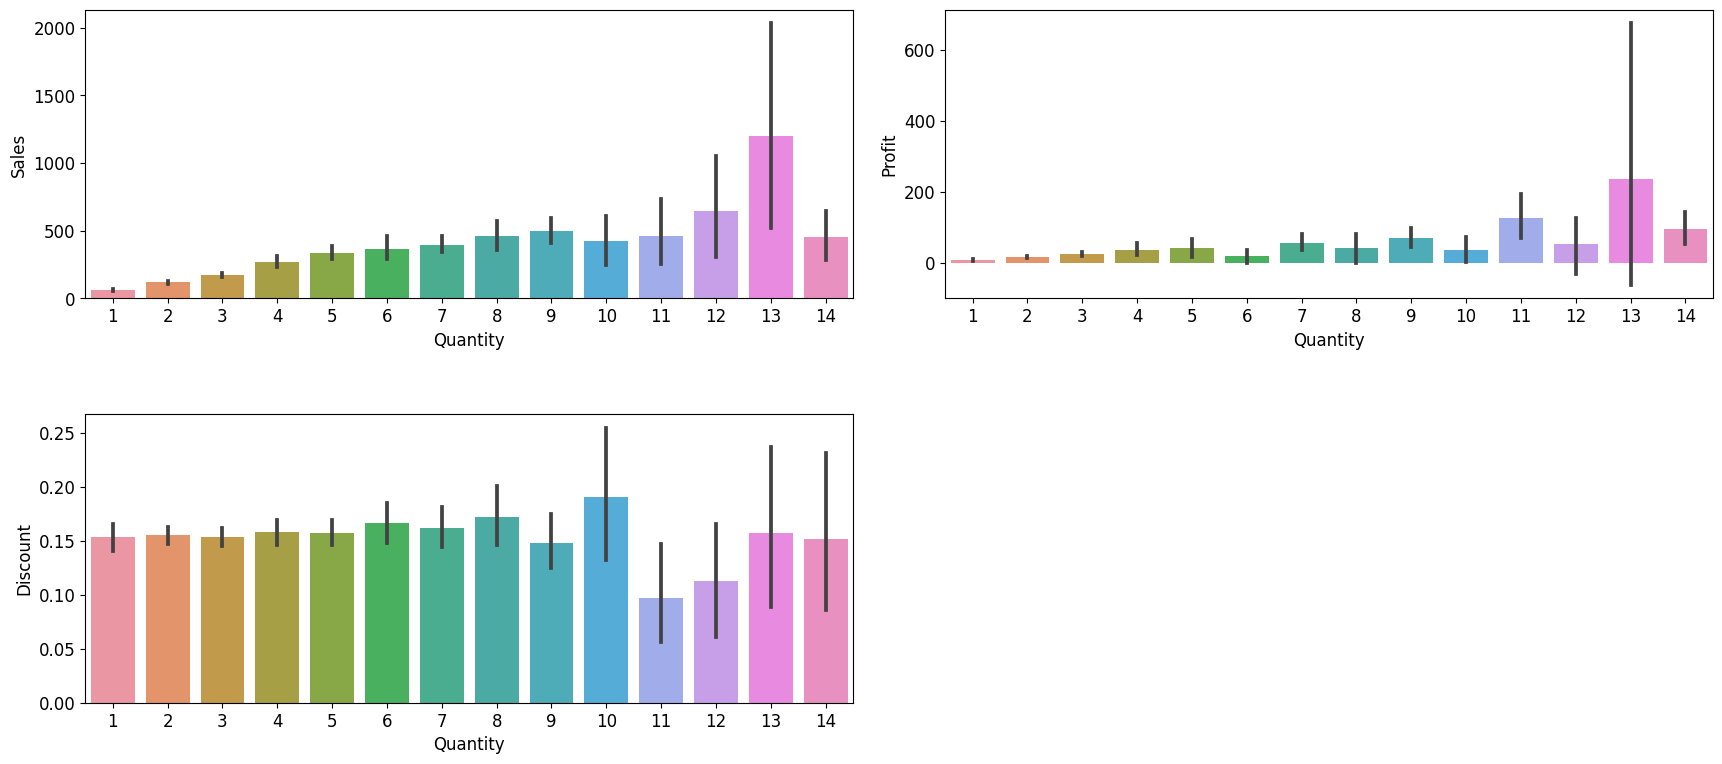

In [67]:
fig=plt.figure(figsize=(21,9))
fig.subplots_adjust(hspace=0.4,wspace=0.12)

ax=fig.add_subplot(221)
sns.barplot(x='Quantity',y='Sales',data=df,ax=ax)

ax=fig.add_subplot(222)
sns.barplot(x='Quantity',y='Profit',data=df,ax=ax)

ax=fig.add_subplot(223)
sns.barplot(x='Quantity',y='Discount',data=df,ax=ax)

Based on Discount -Sales & Profit

<Axes: xlabel='Discount', ylabel='Profit'>

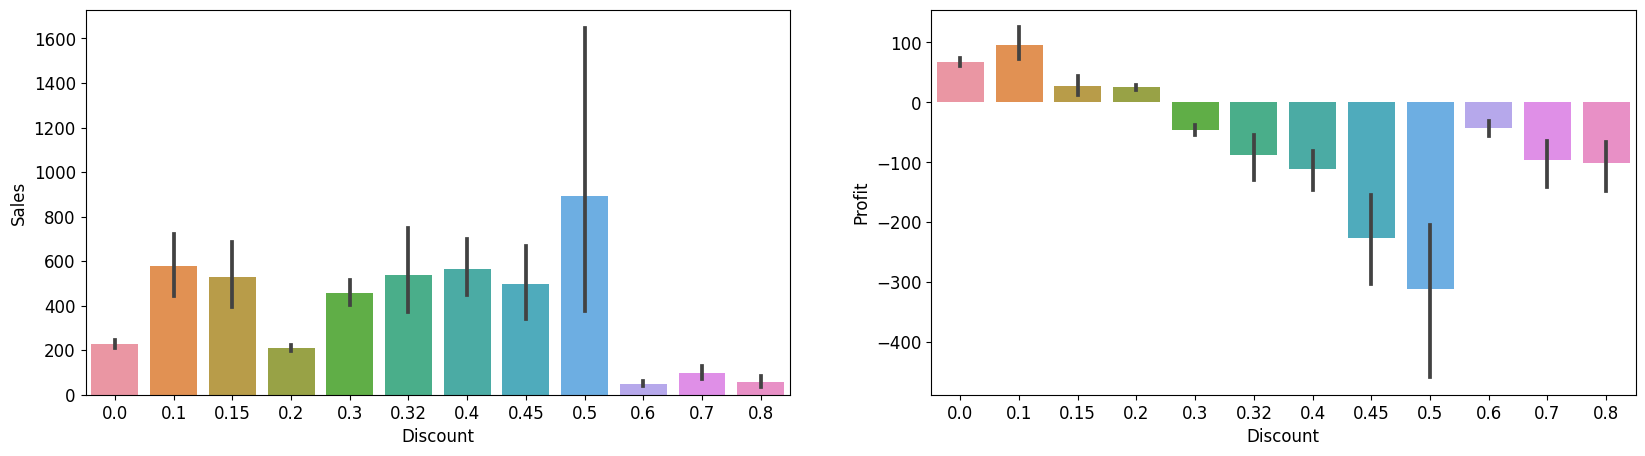

In [68]:
fig,ax=plt.subplots(1,2, figsize= (20,5)) 
sns.barplot(x='Discount', y='Sales',data = df,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = df)

As the Discount is increasing the profits are going into negative. But the same trend can be observed with sales after 6096 dicount rates.At 5 discount the sales are maximum

Category Level Analysis

In [69]:
df['Category'].value_counts().index

Index(['Office Supplies', 'Furniture', 'Technology'], dtype='object')

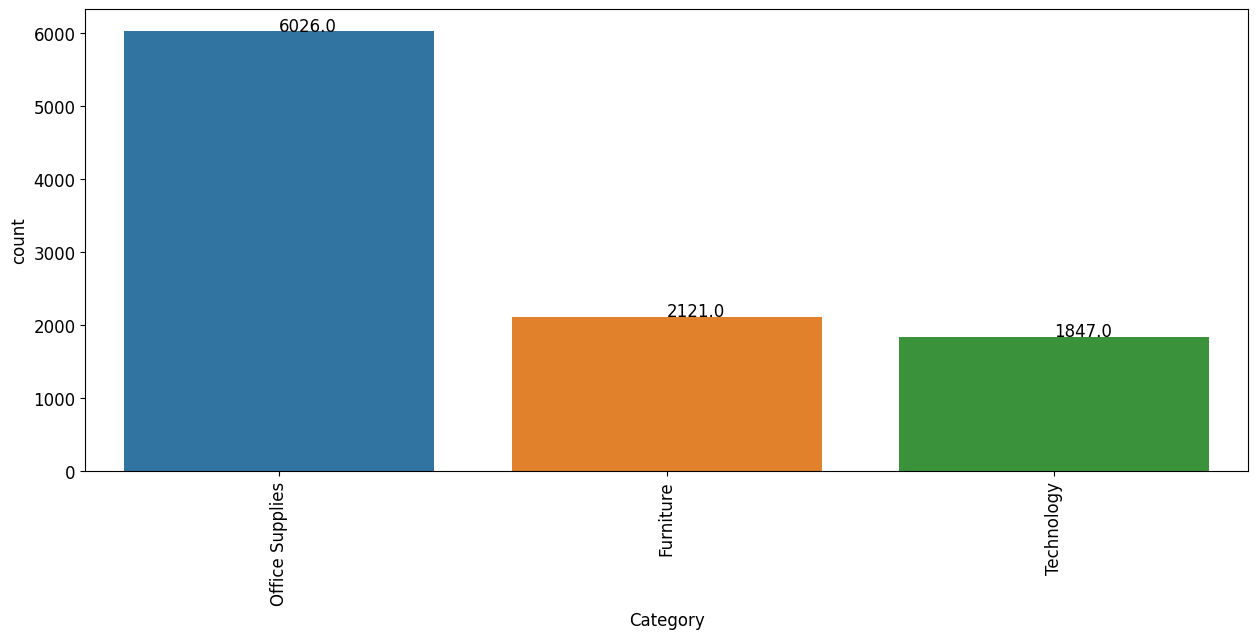

In [70]:
plt.close('all')
plt.figure(figsize=(15,6))
ax=sns.countplot(x="Category", data = df , order=df['Category'].value_counts().index )
plt.xticks (rotation=90)
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.40, p.get_height()+1)) 
plt.show()

The count of office supplies sold is highest when compared to remaining categories



Quantity in each Sub-Category

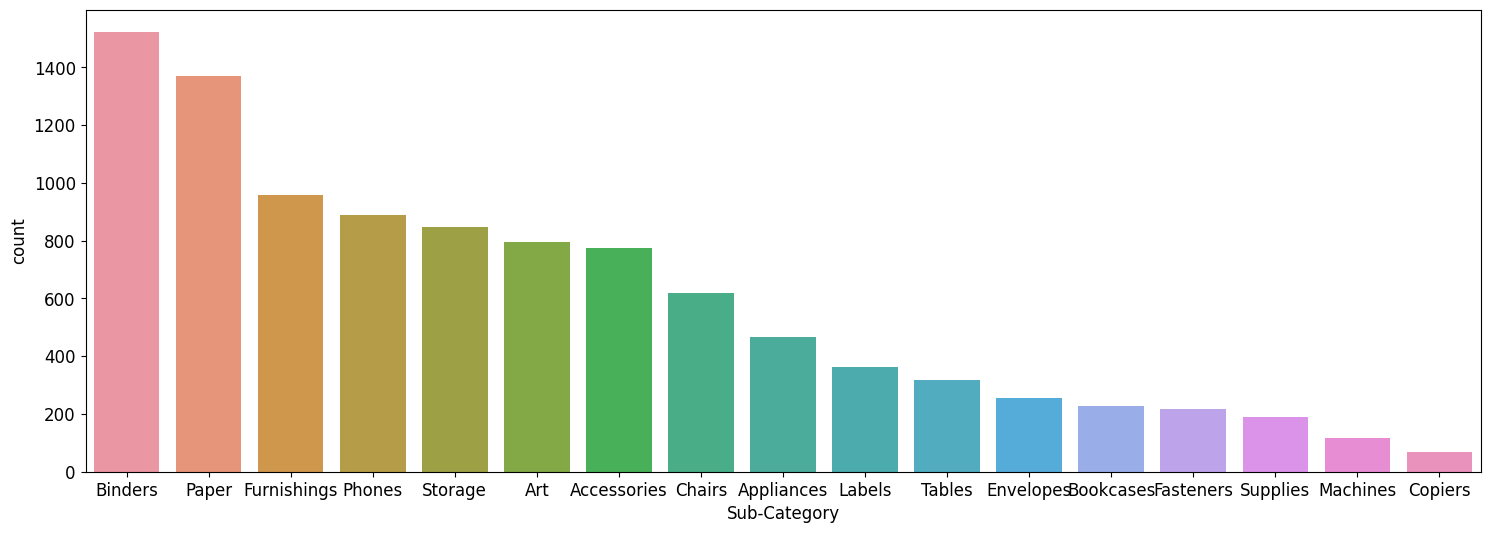

In [71]:
plt.figure(figsize=(18,6))
d4 =sns.countplot(x=df['Sub-Category'], order=df['Sub-Category'].value_counts ().index)
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

<Axes: ylabel='Sub-Category'>

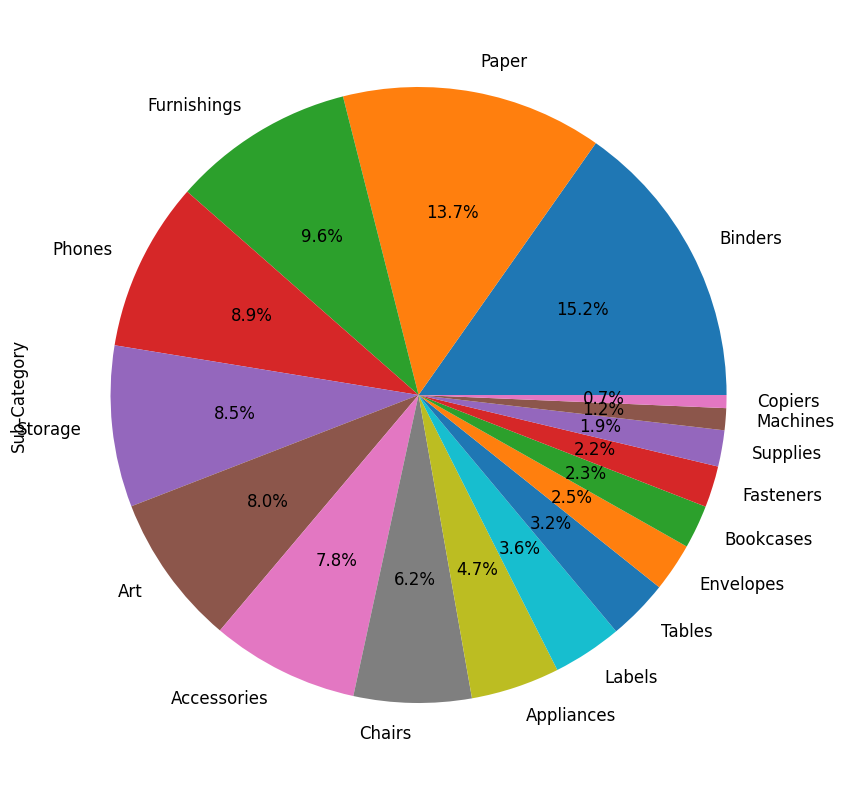

In [72]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

In [73]:
def autopct_format(values) :
  def my_format(pct):
    plt.rcParams['font.size'] = 12.0
    plt.rcParams['font.weight'] = 6
    total = sum(values)
    val = int(round (pct*total/100.0))
    return f'$(val:d)'
  return my_format

Text(0, 0, 'Total Sales:\n$2297200')

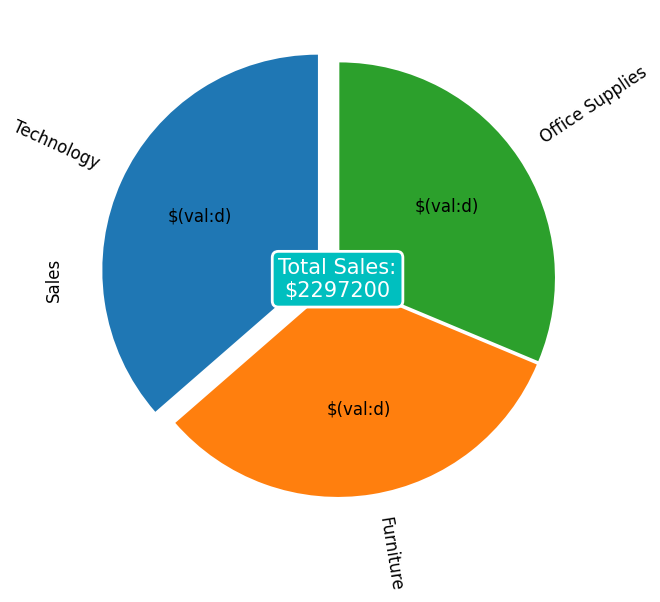

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
Top_category = df.groupby(["Category"])[['Sales']].sum().sort_values("Sales", ascending=False)
total_revenue_category = '$' + str(int(Top_category['Sales'].sum()))
Top_category["Sales"].plot.pie(autopct=autopct_format(Top_category["Sales"]),
                               colors=sns.color_palette(),
                               explode=(0.1,0.01,0.01),
                               startangle=90,
                               rotatelabels=True)

plt.text(0, 0, f'Total Sales:\n{total_revenue_category}', c='w',
         ha="center", va="center", size=15,
         bbox=dict(boxstyle="round,pad=0.3", fc="c", ec="w", lw=2))


Geographic Level Analysis

State wise Sales

<Axes: xlabel='State', ylabel='Sales'>

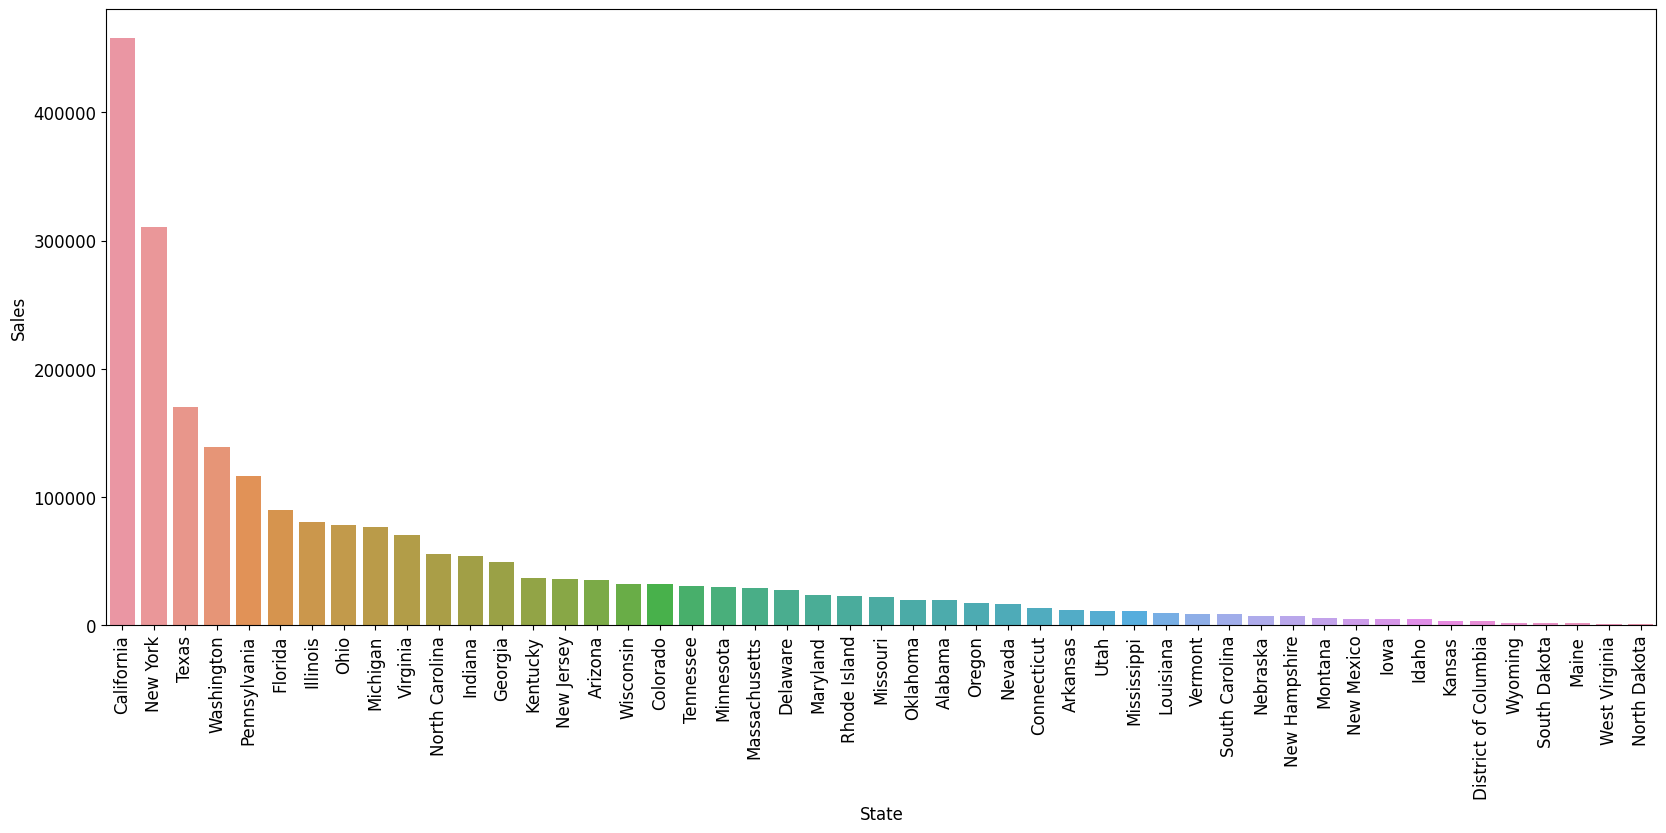

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))

df_state = df.groupby(['State'])[['Sales']].sum().sort_values('Sales', ascending=False)
df_state.reset_index(inplace=True)

plt.xticks(rotation=90)
sns.barplot(x='State', y='Sales', data=df_state)


State wise Profit

<Axes: xlabel='State', ylabel='Profit'>

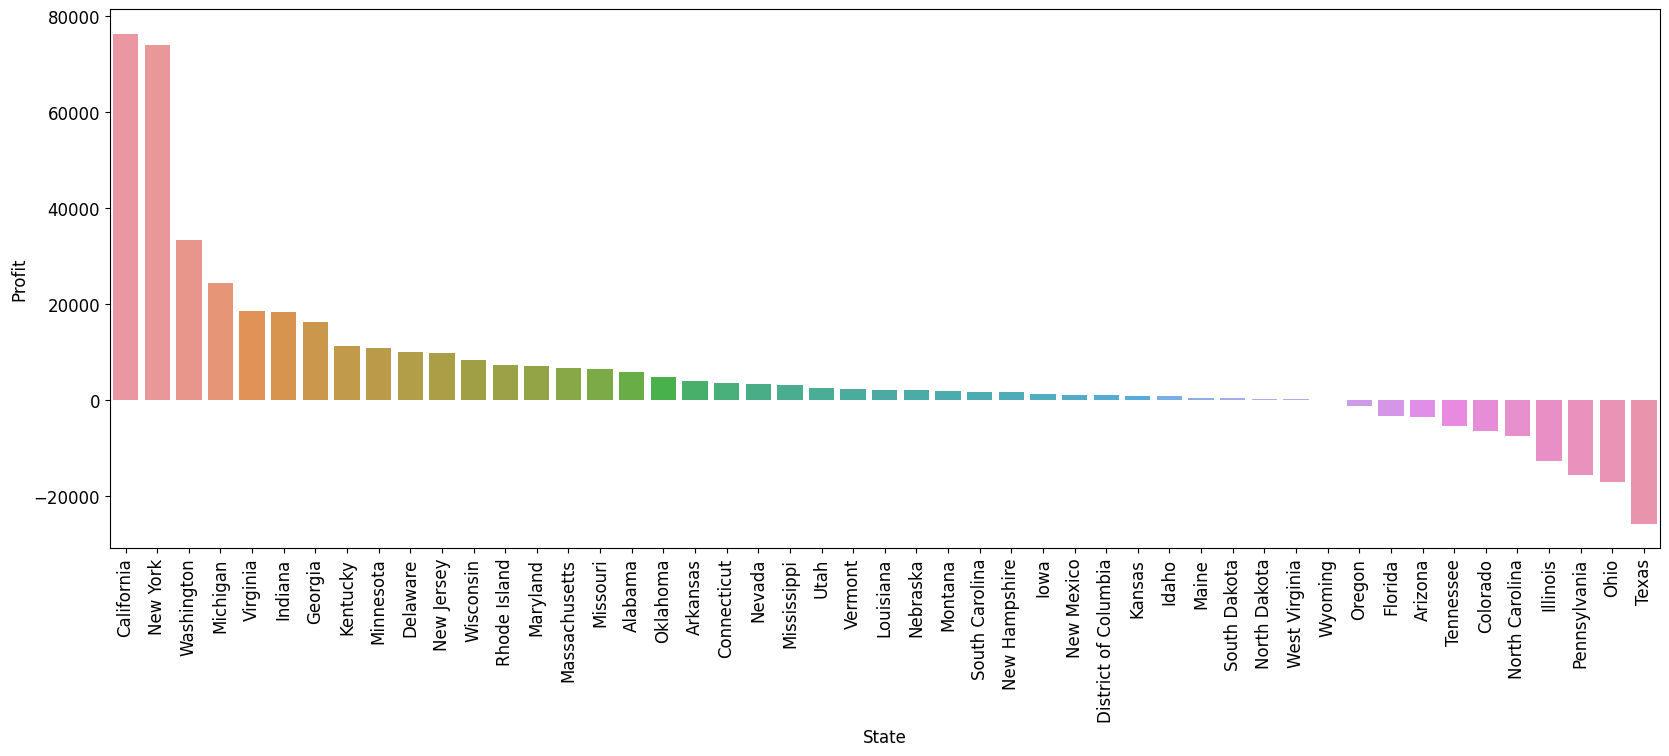

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))

df_state = df.groupby(['State'])[['Profit']].sum().sort_values('Profit', ascending=False)
df_state.reset_index(inplace=True)

plt.xticks(rotation=90)
sns.barplot(x='State', y='Profit', data=df_state)


State wise Discount

<Axes: xlabel='State', ylabel='Discount'>

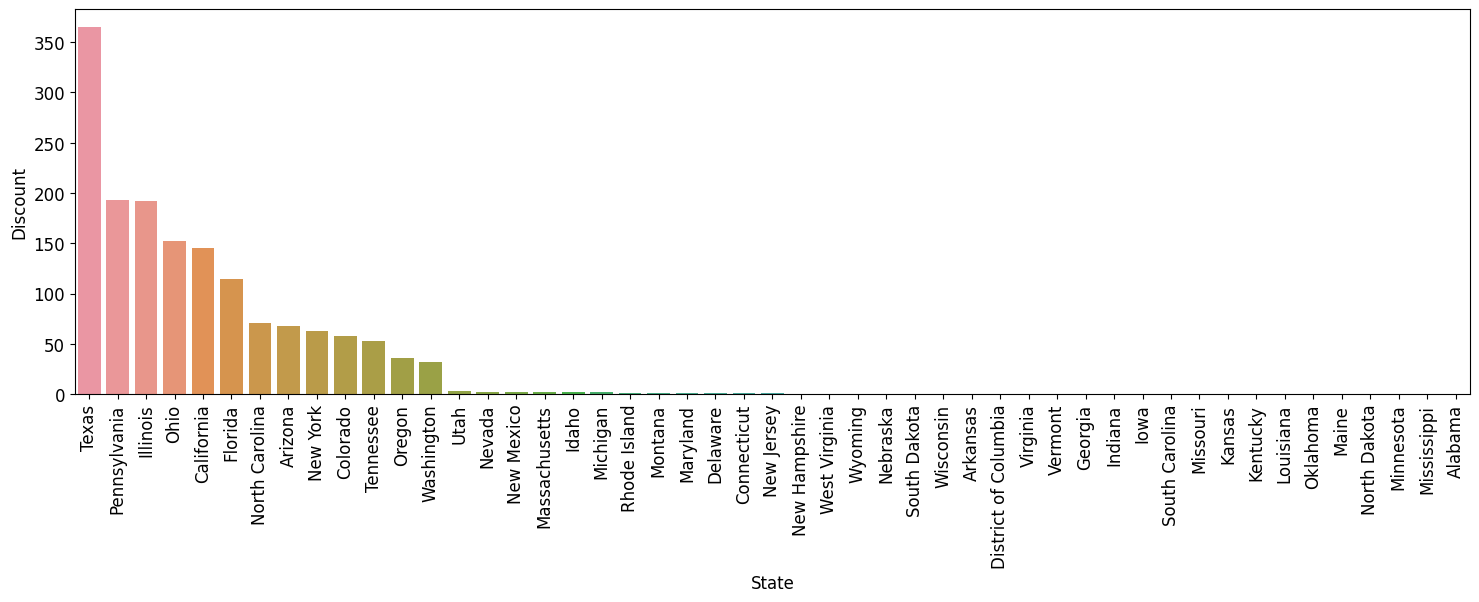

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

data_state = df.groupby(['State'])[['Discount']].sum().sort_values('Discount', ascending=False)
data_state.reset_index(inplace=True)

plt.xticks(rotation=90)
sns.barplot(x='State', y='Discount', data=data_state)


Analaysing States with Profit and Sales

<Axes: xlabel='State', ylabel='value'>

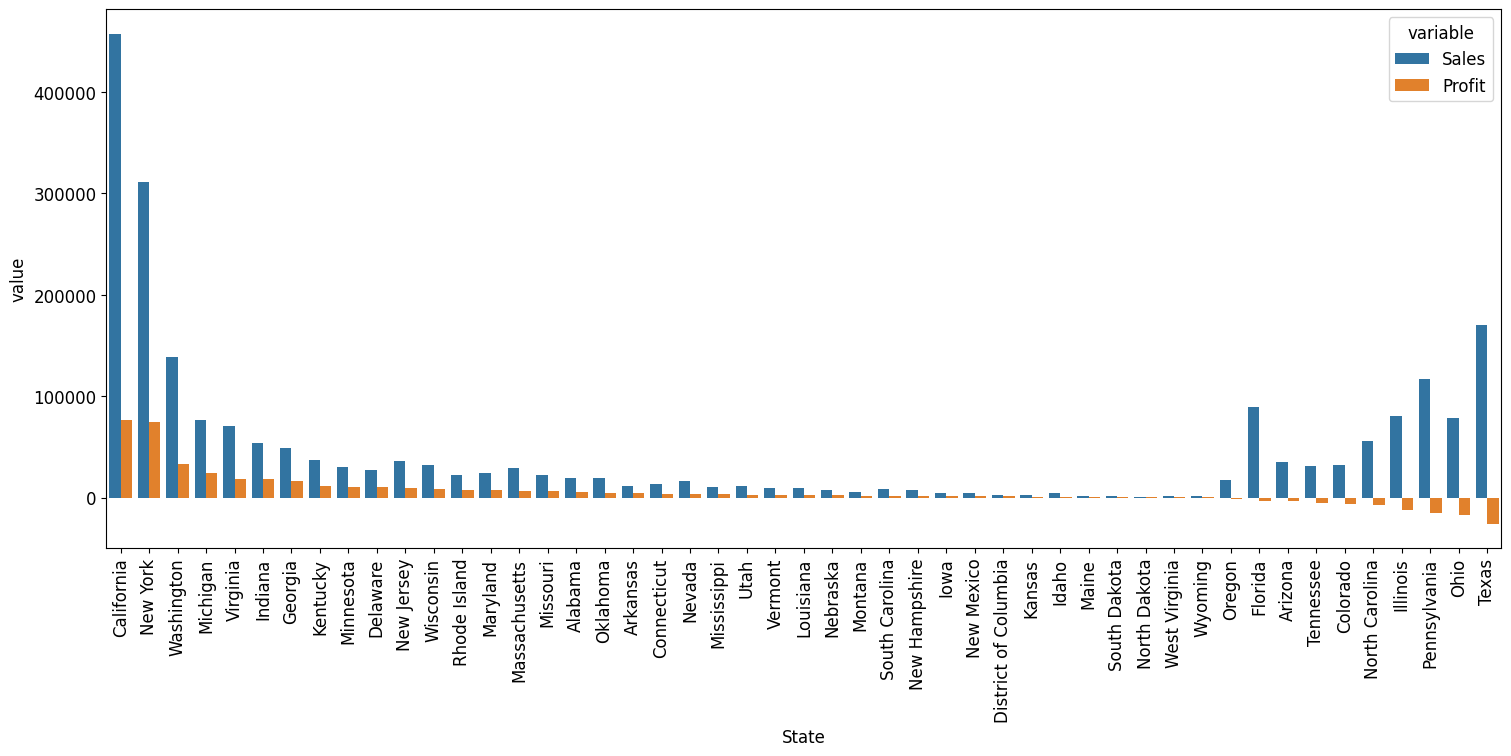

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,7))

data_state = df.groupby(['State'])[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)
data_state.reset_index(inplace=True)

data_state = data_state.melt('State')

plt.xticks(rotation=90)
sns.barplot(x='State', y='value', hue='variable', data=data_state)

# **Thank's**